# Análisis unidimensional
 <a id="1"></a>

## Objetivo

Como ya se dijo anteriormente, el análisis unidimensional consiste en analizar individualmente a las variables (columnas de un DataFrame) para conocer sus características y su naturaleza. Para ello, se emplea mayormente gráficos, aunque tambien se pueden calcular valores estadísticos como el promdio, la mediana, la kurtosis, entre muchos otros.

## Ejemplo de como graficar

- [Ejemplo visualización](#8)

## Técnicas de análisis

1. [DataFrame.describe()](#3)
2. [Indicadores de tendencia central](#1)
3. [Indicadores de dispersión](#2)
4. [Gráficos de distribución](#4)
5. [Gráficos de comparación](#5)
6. [Gráficos de composición](#6)
7. [Utilizando Groupby](#7)

#### Importar lbrerías y cargar datos
__[Fuente de los datos](https://archive.ics.uci.edu/ml/datasets/Forest+Fires)__

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargarlos desde la web
data = pd.read_csv('http://www.dsi.uminho.pt/~pcortez/forestfires/forestfires.csv')

data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## DataFrame.describe()
<a id="3"></a>

Llamando a la función`describe()` de _Pandas_ se obtiene una matriz la cual tiene varios indicadores para cada una de las columnas. Con estos indicaroes se puede tener una visión general de los datos.

In [29]:
data_description = data.describe(include='all')
data_description

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_number
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,7.475822
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,2.275990
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,1.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,7.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,8.000000
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,9.000000


## Visualización
<a id="8"></a>

Esto es solamente un ejemplo de la manipulación de las librerías para graficar. En la celda de abajo, se grafica la distribución de los valores de la *temperatura* y se añaden líneas al gráfico las cuales muestran los indicares de tendencia central así como los límites de los valores atípicos.

Para graficar los datos se utilizan estas dos librerías:

- [Seaborn](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

- [matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html?highlight=axvline)




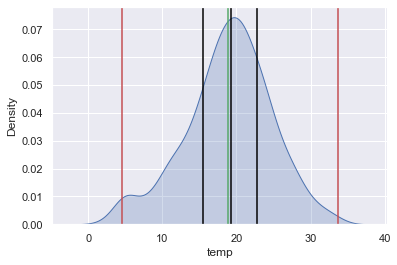

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.kdeplot(data['temp'], shade=True)

# Agrega lineas verticales en los indicadores de la tendencia central
plt.axvline(data['temp'].mean(), color='g') # Agrega una línea color verde, la cual indica el promedio
plt.axvline(data['temp'].median(), color='black') # Agrega una línea color negro, la cual indica la mediana
plt.axvline(data_description['temp']['25%'], color='black') # Agrega una línea color negro, la cual indica el Q1
plt.axvline(data_description['temp']['75%'], color='black') # Agrega una línea color negro, la cual indica el Q3

IQR = data_description['temp']['75%'] - data_description['temp']['25%']

upper_outliers = data_description['temp']['75%'] + 1.5*IQR
lower_outliers = data_description['temp']['25%'] - 1.5*IQR

# Agrega dos líneas de color rojo, las cuales indican los límites para los valores atípicos
plt.axvline(upper_outliers, color='r') 
plt.axvline(lower_outliers, color='r')
plt.show()

## Indicadores de tendencia central 
<a id="1"></a>

Los indicadores que son sirven para medir la tendencia central son:

- **Media**

In [26]:
from statistics import mean

a1 = data['temp'].mean() # utilizando la librería pandas
a2 = mean(data['temp'])  # utilizando la librería  statistics
a3 = np.mean(data['temp']) # utilizando la librería  numpy

print(f'{a1}, {a2}, {a3}')

18.88916827852998, 18.88916827852998, 18.88916827852998


- **Mediana**

In [25]:
from statistics import median

a1 = data['temp'].median() # pandas
a2 = median(data['temp'])  # statistics
a3 = np.median(data['temp']) # numpy

print(f'{a1}, {a2}, {a3}')

19.3, 19.3, 19.3


- **Cuantiles**

Son valores que dividen a los datos en cuatro partes iguales.

    - 1er cuantil (Q1) 	25% de los datos es menor que o igual a este valor.
    - 2do cuantil (Q2) 	La mediana. 50% de los datos es menor que o igual a este valor.
    - 3er cuantil (Q3) 	75% de los datos es menor que o igual a este valor. 

<img src="./img/02-quartiles.png" width="600px"/>

## Indicadores de dispersión
<a id="2"></a>

Estos indicares muestran cuan dispersos están los datos.

- **Varianza, desviación estándar**

<img src="./img/03-dispersion.png" width="600px"/>

In [24]:
from statistics import stdev
from statistics import variance

std1 = data['temp'].std() # pandas
std2 = stdev(data['temp'])  # statistics
std3 = np.std(data['temp']) # numpy

varianza1 = data['temp'].var() # pandas
varianza2 = variance(data['temp'])  # statistics
varianza3 = np.var(data['temp']) # numpy

print(f'Desviación estándar: {std1}, {std2}, {std3}')
print(f'Varianza: {varianza1}, {varianza2}, {varianza3}')

Desviación estándar: 5.806625349573505, 5.806625349573505, 5.801006939598366
Varianza: 33.71689795030963, 33.71689795030963, 33.65168151326841


- **Valores atípicos**

<img src="./img/04-outliers.png" width="600px"/>

- **Asimetría (skweness). Grado de simetría de la distribución.**

<img src="./img/05-skewness.png" width="600px"/>

In [23]:
from scipy.stats import skew

a1 = data['temp'].skew() # pandas
a2 = skew(data['temp'])  # scipy

print(a1, a2)

-0.331172237347285 -0.3302106140354586


- **Curtosis. Indicador de la "anchura" de una distribución**

<img src="./img/06-kurtosis.png" width="600px"/>

In [22]:
from scipy.stats import kurtosis

a1 = data['temp'].kurt() # pandas
a2 = kurtosis(data['temp'])  # scipy

print(a1, a2)

0.1361655076587991 0.12326917606611909


## Gráficos de distribución
<a id="4"></a>

Para visualizar los gráficos, se puede utilizar, en vez de librerias externas como en el ejemplo de arriba, la librería *pandas*. __[Panda's Plots](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)__ 

- **[Histograma](https://es.wikipedia.org/wiki/Histograma)**

Permite visualizar las frecuencias de diferentes categorías o rangos de valores (clases o bins)

<img src="./img/07-histograma.png" width="400px"/>



<AxesSubplot:title={'center':'Histograma Temp'}, ylabel='Frequency'>

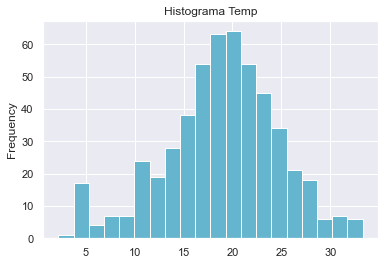

In [21]:
data['temp'].plot.hist(title='Histograma Temp', color='c', bins=20)

- __[Diagrama de Densidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad)__

<img src="./img/08-density-plot.png" width="400px"/>

<AxesSubplot:title={'center':'Densidad Temp'}, ylabel='Density'>

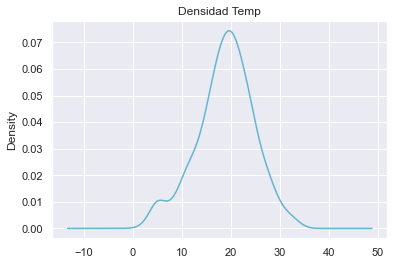

In [20]:
data['temp'].plot.density(title='Densidad Temp', color='c')

- __[Diagrama de Caja](https://es.wikipedia.org/wiki/Diagrama_de_caja)__ 

Este es especialmente útil para la identificación de valores atípicos.

<img src="./img/09-box-plot.png" width="400px"/>

<AxesSubplot:title={'center':'Box Temp'}>

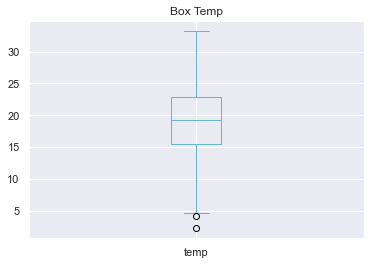

In [19]:
data['temp'].plot.box(title='Box Temp', color='c')

## Gráficos de comparación
<a id="5"></a>

__[Panda's Plots](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)__ 

- __[Gráfico de Barras](https://es.wikipedia.org/wiki/Diagrama_de_barras)__ 

Presenta datos **cualitativos** con barras rectangulares con alturas o longitudes proporcionales a los valores que representan. (No son histogramas!!)

<img src="./img/10-bar-chart.png" width="400px"/>

<AxesSubplot:xlabel='lab'>

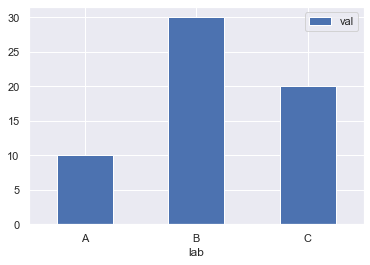

In [18]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
df.plot.bar(x='lab', y='val', rot=0)

- __[Gráfico de lineas](https://en.wikipedia.org/wiki/Line_chart)__

Presenta una serie de valores (marcas) conectados por líneas. Se emplean frecuentemente para visualizar tendencias a lo largo del tiempo.

<img src="./img/11-line-chart.png" width="400px"/>

Para ambos tipos de gráficos, se recomienda aplicarlos para un número reducido de variables (~ 6)

## Gráficos de composición
<a id="6"></a>

__[Panda's Plots](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)__ 

- __[Torta](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)__ 

<img src="./img/12-pie-chart.png" width="400px"/>


<AxesSubplot:ylabel='masa'>

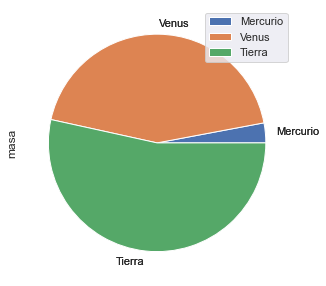

In [16]:
df = pd.DataFrame({'masa': [0.330, 4.87 , 5.97],
                   'radio': [2439.7, 6051.8, 6378.1]},
                  index=['Mercurio', 'Venus', 'Tierra'])

# Las dos maneras son equivalentes
df.plot.pie(y='masa', figsize=(5, 5))
df["masa"].plot.pie()

- __[Barras apiladas](https://businessq-software.com/2017/02/21/stacked-bar-chart-definition-and-examples-businessq/)__

<img src="./img/13-stacked-bar.png" width="400px"/>


In [ ]:
df = pd.DataFrame({'vestimenta': [8261.68, 7875.87 , 4990.23],
                   'equipamiento': [4810.34, 3126.58, 4923.48],
                   'accesorios': [1536.57, 2019.81, 1472.59],},
                  index=['Cherry St', 'Strawberry Mall', 'Peach St'])
df

<AxesSubplot:>

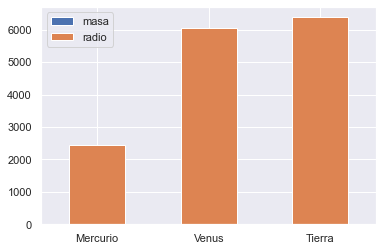

In [17]:
df.plot.bar(stacked=True, rot=0)

## Utilizando Groupby
<a id="7"></a>

__[Panda's groupby](https://pandas.pydata.org/pandas-docs/version/0.23.1/api.html#groupby)__ 

__[Panda's DataFrameGroupBy aggr](https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)__

La función groupby puede ser beneficiosa. Por ejemplo, si queremos saber qué temperatura promedio tiene cada mes se hace lo siguiente:

In [14]:
# Este celda agrega una columna month_number la cual tiene el número del mes.
# Por ejemplo, para una fila que tiene jan como mes, el valor de month_number será 1.
   
def month_number(month):
    if 'jan' == month:
        return 1
    elif 'feb' == month:
        return 2
    elif 'mar' == month:
        return 3
    elif 'apr' == month:
        return 4
    elif 'may' == month:
        return 5
    elif 'jun' == month:
        return 6
    elif 'jul' == month:
        return 7
    elif 'aug' == month:
        return 8
    elif 'sep' == month:
        return 9
    elif 'oct' == month:
        return 10
    elif 'nov' == month:
        return 11
    elif 'dec' == month:
        return 12
    return 0

data["month_number"] = data["month"].map(month_number)

In [15]:
# Ahora, agruparemos los datos según la nueva columna month_number
temperaturas_por_mes = data.groupby("month_number")

# Finalmente, sacaremos el promedio de las temperaturas por mes
temperaturas_por_mes.agg({'temp' : 'mean'})

,temp
month_number,
1,5.250000
2,9.635000
3,13.083333
4,12.044444
5,14.650000
6,20.494118
7,22.109375
8,21.631522
9,19.612209
